In [11]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

!pip install pandas-datareader==0.10.0

/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_51/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.3.0 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.10.0 already installed
flask=1.1.2 already installed


<img src='../../../common/logo_DH.png' align='left' width=35%/>

# APIs - Práctica Guiada II

**Nota**: Esta notebook a veces no funciona por problemas en la API de yahoo.

Si aprece como error "No data fetched using 'YahooDailyReader'" prueben ejecutarla en otro momento.

<a id="section_toc"></a> 
## Tabla de Contenidos

[1- `pandas_datareader`](#section_pdr)

[2- Graficando la Serie de una acción](#section_series)

$\hspace{.5cm}$[2.1- Ejemplo: YPF](#section_ejemplo)

---

<a id="section_pdr"></a> 
###  1- `pandas_datareader`
[volver a TOC](#section_toc)

Para esta práctica usaremos [pandas_datareader](https://github.com/pydata/pandas-datareader), una librería que permite descargar directamente a los formatos (a esta altura muy conocidos) que ofrece Pandas.

La librería permite consumir datos de múltiples fuentes y armar DataFrames completos y con distintos formatos útiles. En esta práctica estudiaremos las series de distintas acciones de empresas conocidas, y estudiaremos gráficamente su comportamiento.

https://pydata.github.io/pandas-datareader/remote_data.html#remote-data-yahoo

In [12]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
from pandas_datareader import data

plt.style.use('seaborn')

In [13]:
# Si se precisa alguna otra acción, editar esta lista.
tickers = ['AAPL', 'MSFT', '^GSPC', 'PAMP.BA','PAM','YPF','YPFD.BA']

In [14]:
start_date = '2010-01-01'
end_date = datetime.datetime.now().strftime('%Y%m%d')

In [17]:
df = data.DataReader(tickers, data_source='yahoo', start=start_date, end=end_date)

Como podemos ver, obtenemos un DataFrame con MultiIndex en columnas, en el cual podemos ver distintos valores de precio para cada acción seleccionada (apertura, cierre, etc.). El formato es el de una serie de tiempo, con distintas posibles variables a regresionar (si quisiéramos hacerlo).

Para esta práctica, vamos a tomar como unidad de análisis el precio de cierre, de modo de quedar con un DataFrame cuya unidad observacional sea el cierre de un día, para cada una de las empresas observadas.

In [23]:
df.head()

Attributes Adj Close                                                          \
Symbols         AAPL       MSFT        ^GSPC   PAMP.BA        PAM        YPF   
Date                                                                           
2010-01-04  6.553025  23.904985  1132.989990  1.799476  11.756644  35.911705   
2010-01-05  6.564354  23.912706  1136.520020  1.779592  11.628211  35.267986   
2010-01-06  6.459939  23.765963  1137.140015  1.709999  11.065077  36.008266   
2010-01-07  6.447999  23.518795  1141.689941  1.729883  11.292306  35.662254   
2010-01-08  6.490865  23.680998  1144.979980  1.670232  11.124354  36.128956   

Attributes                 Close                          ...   Open  \
Symbols        YPFD.BA      AAPL       MSFT        ^GSPC  ...    PAM   
Date                                                      ...          
2010-01-04  137.264740  7.643214  30.950001  1132.989990  ...  11.85   
2010-01-05  143.195923  7.656429  30.959999  1136.520020  ...  11.92   
2010-01-06  141.501312  7.534643  30.770000  1137.140015  ...  11.70   
2010-01-07  141.670776  7.520714  30.450001  1141.689941  ...  11.30   
2010-01-08  141.501312  7.570714  30.660000  1144.979980  ...  11.30   

Attributes                              Volume                            \
Symbols           YPF     YPFD.BA         AAPL        MSFT         ^GSPC   
Date                                                                       
2010-01-04  43.830002  163.000000  493729600.0  38409100.0  3.991400e+09   
2010-01-05  44.310001  165.000000  601904800.0  49749600.0  2.491020e+09   
2010-01-06  43.900002  167.000000  552160000.0  58182400.0  4.972660e+09   
2010-01-07  44.750000  167.500000  477131200.0  50559700.0  5.270680e+09   
2010-01-08  43.950001  167.199997  447610800.0  51197400.0  4.389590e+09   

Attributes                                       
Symbols       PAMP.BA      PAM      YPF YPFD.BA  
Date                                             
2010-01-04  2827176.0  38200.0   5100.0   251.0  
2010-01-05  1843305.0  58800.0   5300.0   540.0  
2010-01-06  2682981.0  45800.0   3900.0  1020.0  
2010-01-07  2288603.0  12800.0  11900.0   153.0  
2010-01-08  2113019.0  11700.0   5600.0    85.0  

[5 rows x 42 columns]

In [24]:
close = df['Close']
close.head()

Symbols,AAPL,MSFT,^GSPC,PAMP.BA,PAM,YPF,YPFD.BA
Date,,,,,,,
2010-01-04,7.643214,30.950001,1132.989990,1.81,11.90,44.630001,162.000000
2010-01-05,7.656429,30.959999,1136.520020,1.79,11.77,43.830002,169.000000
2010-01-06,7.534643,30.770000,1137.140015,1.72,11.20,44.750000,167.000000
2010-01-07,7.520714,30.450001,1141.689941,1.74,11.43,44.320000,167.199997
2010-01-08,7.570714,30.660000,1144.979980,1.68,11.26,44.900002,167.000000


In [19]:
# freq='B' representa sólo los días de semana (business days).
all_weekdays = pd.date_range(start=start_date, end=end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.fillna(method='ffill')

Observemos un poco cómo se distribuyen estos precios:

In [20]:
close.describe()

Symbols,AAPL,MSFT,^GSPC,PAMP.BA,PAM,YPF,YPFD.BA
count,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000,3153.000000
mean,43.636268,87.663219,2277.167195,29.248381,20.235246,21.191286,374.562147
std,39.467885,78.266223,908.655253,36.021952,16.567096,12.251507,227.091288
min,6.858929,23.010000,1022.580017,0.813000,2.850000,2.570000,66.500000
25%,18.572500,30.950001,1470.680054,2.110000,10.430000,12.820000,177.000000
50%,28.387501,51.790001,2089.459961,12.200000,14.600000,19.000000,318.299988
75%,48.705002,111.709999,2806.830078,46.750000,25.490000,29.540001,541.950012
max,182.009995,343.109985,4796.560059,182.149994,71.650002,54.580002,971.049988


<a id="section_series"></a> 
###  2- Graficando la Serie de una acción.
[volver a TOC](#section_toc)

Ahora vamos a elegir una empresa de las que observamos, y vamos a observar la serie de tiempo de sus precios de cierre. Para ello vamos a armar una pequeña función, que con la sigla de la empresa nos genere las visualizaciones que necesitamos.

In [21]:
def graph_time_series(name):
    """
    Función para graficar los precios de cierre.
    
    Parameters
    ----------
    name : str
        Nombre de la acción a rastrear.

    """
    stock = close.loc[:, name]

    short_rolling_stock = stock.rolling(window=20).mean()
    long_rolling_stock = stock.rolling(window=100).mean()

    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(stock.index, stock, label=name)
    ax.set_title(f"Rolling means and actual value for stock {name}\n", fontsize=26)
    ax.tick_params(labelsize=14)
    ax.plot(short_rolling_stock.index, short_rolling_stock, label='20 days rolling')
    ax.plot(long_rolling_stock.index, long_rolling_stock, label='100 days rolling')
    ax.legend(fontsize=14)

<a id="section_ejemplo"></a> 
####  2.1- Ejemplo: YPF.
[volver a TOC](#section_toc)

Vamos a usar nuestra función para generar una visualización para una empresa.

**BONUS:** intentar usar la serie de alguna empresa para predecir los precios de la acción.

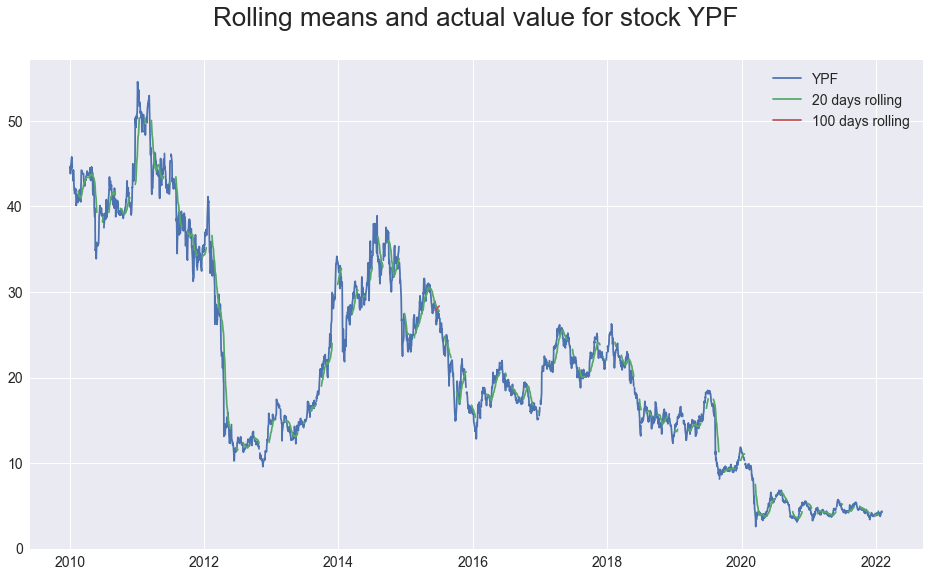

In [44]:
%matplotlib inline
graph_time_series("YPF")